In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, auc,roc_auc_score, precision_score, recall_score,f1_score, roc_curve
from matplotlib import pyplot as plt
from collections import Counter

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# **Import data**

In [2]:
data_path = 'https://raw.githubusercontent.com/sahdan96/randomforest/main/train_2v.csv'
data = pd.read_csv(data_path)

# **pre-processing data**

In [3]:
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())
data.dropna(axis=0, inplace=True)
data.drop(columns ='id', inplace =True)

In [4]:
encode_gender = LabelEncoder()
encode_marry = LabelEncoder()
encode_work = LabelEncoder()
encode_residence = LabelEncoder()
encode_smoking = LabelEncoder()
data['gender'] = encode_gender.fit_transform(data['gender'])
data['ever_married'] = encode_marry.fit_transform(data['ever_married'])
data['work_type'] = encode_work.fit_transform(data['work_type'])
data['Residence_type'] = encode_residence.fit_transform(data['Residence_type'])
data['smoking_status'] = encode_smoking.fit_transform(data['smoking_status'])

# **split data**

In [5]:
x = data.drop('stroke', axis=1)
y = data.stroke

In [61]:
y.value_counts()

0    29470
1      638
Name: stroke, dtype: int64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# **Undersampling**

In [7]:
rus = RandomUnderSampler(random_state=0)
X_train_resampled, Y_train_resampled = rus.fit_resample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [8]:
## train class count
print("before sampling:\n"+ str(Counter(y_train))+"\n\nafter sampling:\n"+ str(Counter(Y_train_resampled)))

before sampling:
Counter({0: 23577, 1: 509})

after sampling:
Counter({0: 509, 1: 509})


# **training + testing/prediction**

In [9]:
rf_model = RandomForestClassifier(bootstrap=True, max_depth=None, 
                                  max_features='auto', max_leaf_nodes= None,
                                  min_impurity_decrease= 0.0, min_impurity_split=None,
                                  min_samples_leaf= 1, min_samples_split= 2,
                                  min_weight_fraction_leaf=0.0, 
                                  n_estimators=10, random_state=42,
                                n_jobs=None, oob_score=False,
                       verbose=0, warm_start=False)
rf_model2 = RandomForestClassifier(bootstrap=True, max_depth=None, 
                                  max_features='auto', max_leaf_nodes= None,
                                  min_impurity_decrease= 0.0, min_impurity_split=None,
                                  min_samples_leaf= 1, min_samples_split= 2,
                                  min_weight_fraction_leaf=0.0, 
                                  n_estimators=10, random_state=42,
                                n_jobs=None, oob_score=False,
                       verbose=0, warm_start=False)

rf_model.fit(X_train_resampled, Y_train_resampled)
rf_model2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [10]:
y_train_pred = rf_model.predict(X_train_resampled)
y_test_pred = rf_model.predict(X_test)

y_train_pred2 = rf_model2.predict(X_train)
y_test_pred2 = rf_model2.predict(X_test)

# **train & test benchmark**

In [11]:
acc = accuracy_score(Y_train_resampled, y_train_pred)
pre = precision_score(Y_train_resampled, y_train_pred)
re = recall_score(Y_train_resampled, y_train_pred)
f1 = f1_score(Y_train_resampled, y_train_pred)

acc2 = accuracy_score(y_test, y_test_pred)
pre2 = precision_score(y_test, y_test_pred)
re2 = recall_score(y_test, y_test_pred)
f12 = f1_score(y_test, y_test_pred)
print("training benchmark:")
print("accuracy:\t"+str(acc)+"\nprecision:\t"+str(pre)+"\nrecall:\t\t"+str(re)+"\nf1:\t\t"+str(f1))
print("\ntesting benchmark:")
print("accuracy:\t"+str(acc2)+"\nprecision:\t"+str(pre2)+"\nrecall:\t\t"+str(re2)+"\nf1:\t\t"+str(f12))

training benchmark:
accuracy:	0.9823182711198428
precision:	0.9900199600798403
recall:		0.9744597249508841
f1:		0.982178217821782

testing benchmark:
accuracy:	0.7401195616074394
precision:	0.05292652552926526
recall:		0.6589147286821705
f1:		0.09798270893371758


In [12]:
acc3 = accuracy_score(y_train, y_train_pred2)
pre3 = precision_score(y_train, y_train_pred2)
re3 = recall_score(y_train, y_train_pred2)
f13 = f1_score(y_train, y_train_pred2)

acc4 = accuracy_score(y_test, y_test_pred2)
pre4 = precision_score(y_test, y_test_pred2)
re4 = recall_score(y_test, y_test_pred2)
f14 = f1_score(y_test, y_test_pred2)
print("training benchmark:")
print("accuracy:\t"+str(acc3)+"\nprecision:\t"+str(pre3)+"\nrecall:\t\t"+str(re3)+"\nf1:\t\t"+str(f13))
print("\ntesting benchmark:")
print("accuracy:\t"+str(acc4)+"\nprecision:\t"+str(pre4)+"\nrecall:\t\t"+str(re4)+"\nf1:\t\t"+str(f14))

training benchmark:
accuracy:	0.9956406211076975
precision:	1.0
recall:		0.793713163064833
f1:		0.8849945235487403

testing benchmark:
accuracy:	0.9784124875456659
precision:	0.4
recall:		0.015503875968992248
f1:		0.029850746268656712


In [13]:
cm= confusion_matrix(Y_train_resampled,y_train_pred)
cm2= confusion_matrix(y_test,y_test_pred)
print("confusion matrix for training:\n"+str(cm)+"\n\nconfusion matrix for testing:\n"+str(cm2))

confusion matrix for training:
[[504   5]
 [ 13 496]]

confusion matrix for testing:
[[4372 1521]
 [  44   85]]


In [14]:
cm3= confusion_matrix(y_train,y_train_pred2)
cm24= confusion_matrix(y_test,y_test_pred2)
print("confusion matrix for training:\n"+str(cm3)+"\n\nconfusion matrix for testing:\n"+str(cm24))

confusion matrix for training:
[[23577     0]
 [  105   404]]

confusion matrix for testing:
[[5890    3]
 [ 127    2]]


In [15]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.74      0.85      5893
           1       0.05      0.66      0.10       129

    accuracy                           0.74      6022
   macro avg       0.52      0.70      0.47      6022
weighted avg       0.97      0.74      0.83      6022



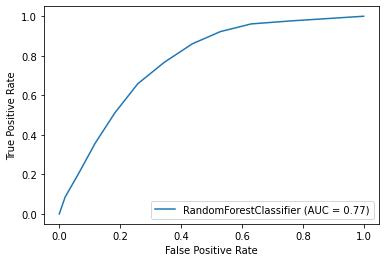

In [16]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf_model, X_test, y_test)  
plt.show()

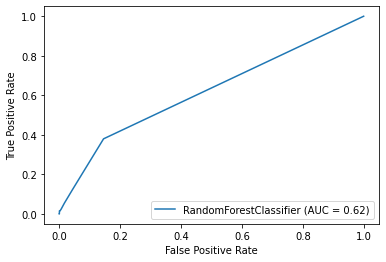

In [21]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf_model2, X_test, y_test)  
plt.show()

In [17]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_pred)
print(auc(false_positive_rate, true_positive_rate))
# 0.857142857143
print(roc_auc_score(y_test, y_test_pred))
# 0.857142857143

0.7004059474057381
0.7004059474057381


In [18]:
gg= rf_model.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,gg))

gg2= rf_model2.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,gg2))

0.7718282234736522
0.6181364830432112


In [19]:
gg3= rf_model.predict(X_test)
print(roc_auc_score(y_test,gg3))

gg24= rf_model2.predict(X_test)
print(roc_auc_score(y_test,gg24))

0.7004059474057381
0.5074973987006


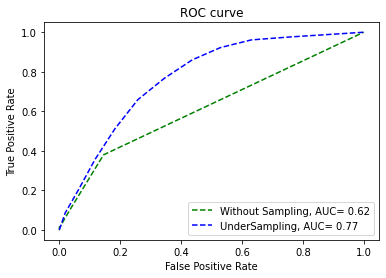

In [33]:
# y_pred_proba = rf_model.predict_proba(X_test)[::,1]
y_pred_proba = rf_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
aucc = round(float(roc_auc_score(y_test, y_pred_proba)),2)

y_pred_proba2 = rf_model2.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = roc_curve(y_test, y_pred_proba2)
aucc2 = round(float(roc_auc_score(y_test, y_pred_proba2)),2)

plt.plot(fpr2, tpr2, linestyle='--', color='green', label ='Without Sampling, AUC= '+str(aucc2))
plt.plot(fpr, tpr, linestyle='--', color='blue', label ='UnderSampling, AUC= '+str(aucc))

# plt.plot(fpr3, tpr3, linestyle='--', color='green', label ='Random Forest, AUC= '+str(aucc3))
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

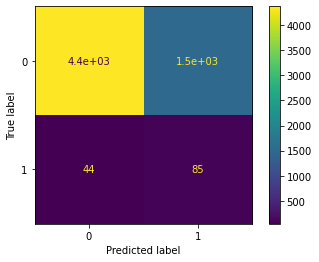

In [34]:
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(rf_model, X_test, y_test)  
plt.show() 

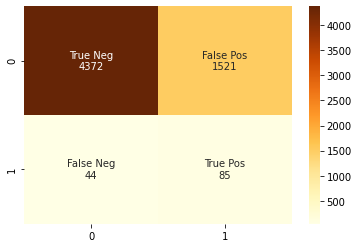

In [56]:
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_test_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='YlOrBr')

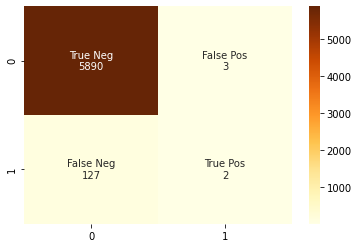

In [57]:
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_test_pred2)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='YlOrBr')

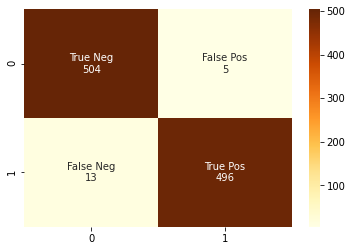

In [59]:
import seaborn as sns
cf_matrix = confusion_matrix(Y_train_resampled, y_train_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='YlOrBr')

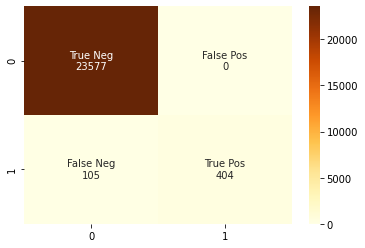

In [60]:
import seaborn as sns
cf_matrix = confusion_matrix(y_train, y_train_pred2)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='YlOrBr')